## Case Study: Churn Prediction of Telecom Customer  

## Telecom Churn Prediction 

In Service industry , the customer churn means retaining of customer for longer period. In Telecom Industry , the customer have wider options to choose and switch to different operator. The Churn analysis helps provide best services to customer to ensure they retain the telecom operators. For a telecom corporate the total turnaround cost and effort to retain existing customer is way much cheaper in comparison to new customer subscription. 

In this case study we will evaluate the churn factors of customers data , evaluate the target feature analysis , applying 3 classification models to ensure accurate prediction. The data has been collected from an open source website `'www.kaggle.com'.` The Dataset is located at `'https://www.kaggle.com/blastchar/telco-customer-churn' `link. The Dataset name is:' WA_Fn-UseC_-Telco-Customer-Churn.csv '.
The dataset has `total 21 columns and 7043 rows` , which contains various catogaries of customer services and personal traits. The dataset has important catogary like Duration,ISP provider, Monthly Charges and final churn field.  

##### Target Feature:
`Target Feature selected is 'Churn' ` Column which will predict the behavior of the telecom customer based on 20 fields values provided in the dataset. The target feature 'Churn' contains 2 values - Yes/No. 

## Contents


This report is organized as follows:
* **Section 1 Objective**
* **Section 2 Overview**
* **Section 3 Data Preparation**
* **Section 4 Data Exploration/Visualization**
* **Section 5 Data Sampling & Train-Test Splitting**
* **Section 6 Classification Model Implementation**
* **Section 7 Performance Comparison**
* **Section 8 References**

Compiled from a Jupyter Notebook, this report contains both narratives and the Python code used throughout the project.

## Section 1 Objective

The Objective of this Case study is to prepare a prediction model with selecting best 7 descriptive features and train our model using various classification models. We will evaluate the performance and accuracy of models using:  
* KNN 
* Decision Tree
* Logistics regression model. 

The Correlation matrix will be used to evaluate the best features in comparison to target feature 'Churn'. The data set will be cleaned and modelled to ensure no data inconsistencies is present. We will plot various graphs of the features for data exploration.

The Objective is too study the dataset and implement Data Preparation, Data Exploration and then choose 7 features which will help to predict the churn outcome of the customer. The Data will be modelled using correlation Matrix and trained using 75:25 using train test model. Hence, the trained test set will be used in three classification model to evaluate the  model with best accuracy proportion. we will compare the AUC and confusion matrix to prove our findings through this case study.

## Section 2 Overview 

We consider the following (binary) classifiers to predict the target feature:

* Logistics Regression Model
* Decision trees (DT)
* K-Nearest Neighbors (KNN)

Our modeling strategy begins by transforming the full dataset cleaned in Phase I. This transformation includes hot encoding of categorical descriptive features as numerical for two features in dataset. We first sample 7k rows from the full dataset and then split this sample into training and test sets with a 75:25 ratio. This way, our training data has 5K rows and test data has 2K rows. 

The 5K rows of data used during the hyperparameter tuning phase is called the training data.
The 2K rows of data used during the performance comparison phase is called the test data.

## Section 3 Data Preparation

The Data Preparation is the first phase where we analyze the initial raw form of data. The data is loaded into the notebook to 
we look into data for inconsistent values like missing values,typos, data type conversion or omitting the extra columns.

In this dataset we will perform below activities:
* Loading the Dataset
* Checking for Missing Values, Typos, Spaces 
* Imputing with correct values 
* Data Mapping Values 
* Hot encoding the columns



So, Lets start with Data Preparation

#### Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization

In [2]:
df = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv',encoding= 'unicode_escape')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking Attributes of Dataset

In [3]:
df.shape

(7043, 21)

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [173]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ISP-DSL,ISP-Fiber Optic,ISP-No,tenure_group
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,5517.000000,...,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043
unique,7043,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,1098-KFQEC,NaN,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,NaN,...,Month-to-month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tenure_0-12
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,3390,3096,NaN,...,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2186
mean,NaN,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,0.365960,...,NaN,0.592219,1.315633,64.761692,2279.765853,0.265370,0.343746,0.439585,0.216669,NaN
std,NaN,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,NaN,NaN,0.481742,...,NaN,0.491457,1.148907,30.090047,2266.762876,0.441561,0.474991,0.496372,0.412004,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,0.000000,...,NaN,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,1.000000,...,NaN,1.000000,2.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,NaN


#### Mapping values of Columns to numeric 

In [6]:
#Mapping the values 

yes_no ={"Yes":1, "No":0 }
gender = {"Female":1,"Male":0 }
PaymentMethod = {"Electronic check":0, "Mailed check" :1, "Bank transfer (automatic)":2, "Credit card (automatic)":3 }

In [7]:
## Applying the values on dataset columns

df['Churn']=df['Churn'].map(yes_no)
df['gender'] = df['gender'].map(gender)
df['Partner']=df['Partner'].map(yes_no)
df['Dependents']=df['Dependents'].map(yes_no)
df['PhoneService']=df['PhoneService'].map(yes_no)
df['OnlineSecurity']=df['OnlineSecurity'].map(yes_no)
df['PaperlessBilling']=df['PaperlessBilling'].map(yes_no)
df['PaymentMethod'] = df['PaymentMethod'].map(PaymentMethod)

#### Imputing Missing values in TotalCharges Column

In [8]:
df[df['TotalCharges']==' '].index.tolist()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [9]:
df['TotalCharges'].mode()

0        
1    20.2
dtype: object

In [14]:
# Replacing the missing values with mode value. The mean calculated is 2308 which may prove the inconsistency, so considering 7k colum. 
# We will replace the missing values with mode.

df.at[488,'TotalCharges']=df['TotalCharges'].mode()
df.at[753,'TotalCharges']=df['TotalCharges'].mode()
df.at[936,'TotalCharges']=df['TotalCharges'].mode()
df.at[1082,'TotalCharges']=df['TotalCharges'].mode()
df.at[1340,'TotalCharges']=df['TotalCharges'].mode()
df.at[3331,'TotalCharges']=df['TotalCharges'].mode()
df.at[3826,'TotalCharges']=df['TotalCharges'].mode()
df.at[4380,'TotalCharges']=df['TotalCharges'].mode()
df.at[5218,'TotalCharges']=df['TotalCharges'].mode()
df.at[6670,'TotalCharges']=df['TotalCharges'].mode()
df.at[6754,'TotalCharges']=df['TotalCharges'].mode()

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [16]:
# Checking the length of column values
len(df['TotalCharges'])

7043

#### Hot encoding of the column values

Hot encoding is a representation of categorical variables as binary vectors. Hot encoding is applied on the catogarical which will model into numerical distribution of dataset from the values. This will help in modelling the data and mapping with target field.
In this case study , we will apply hot encoding on:
* Total Charges 
* Tenure 

#### Total Charges columns

In [17]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['InternetService']]).toarray())
df = df.join(enc_df)

In [18]:
#Renaming the Columns after hot
df = df.rename(columns={
        0: "ISP-DSL",
        1: "ISP-Fiber Optic",
        2: "ISP-No"
        })

In [19]:
df[df.columns[21:24]].sum()

ISP-DSL            2421.0
ISP-Fiber Optic    3096.0
ISP-No             1526.0
dtype: float64

#### Tenure Column

In [20]:
# Hot encoding on Tenure co

def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),
                                      axis = 1)

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ISP-DSL,ISP-Fiber Optic,ISP-No,tenure_group
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,0.0,...,Month-to-month,1,0,29.85,29.85,0,1.0,0.0,0.0,Tenure_0-12
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,1.0,...,One year,0,1,56.95,1889.50,0,1.0,0.0,0.0,Tenure_24-48
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,1.0,...,Month-to-month,1,1,53.85,108.15,1,1.0,0.0,0.0,Tenure_0-12
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,1.0,...,One year,0,2,42.30,1840.75,0,1.0,0.0,0.0,Tenure_24-48
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,0.0,...,Month-to-month,1,0,70.70,151.65,1,0.0,1.0,0.0,Tenure_0-12


### Correlation Matrix of features


After Data Preparation activity , where we have analyzed the data and ensure raw data is ready for further processing. The Correlation matrix is build to analyse the dependency of values with regards to target feature. we need to find the best target feature which will be evaluated on numerical values of dataset. 
With the help of correlation matrix , we will correaltion coeeficient is between -1.0 and 1.0. we will look for the closer values and will find positive values in regards to Churn target feature.


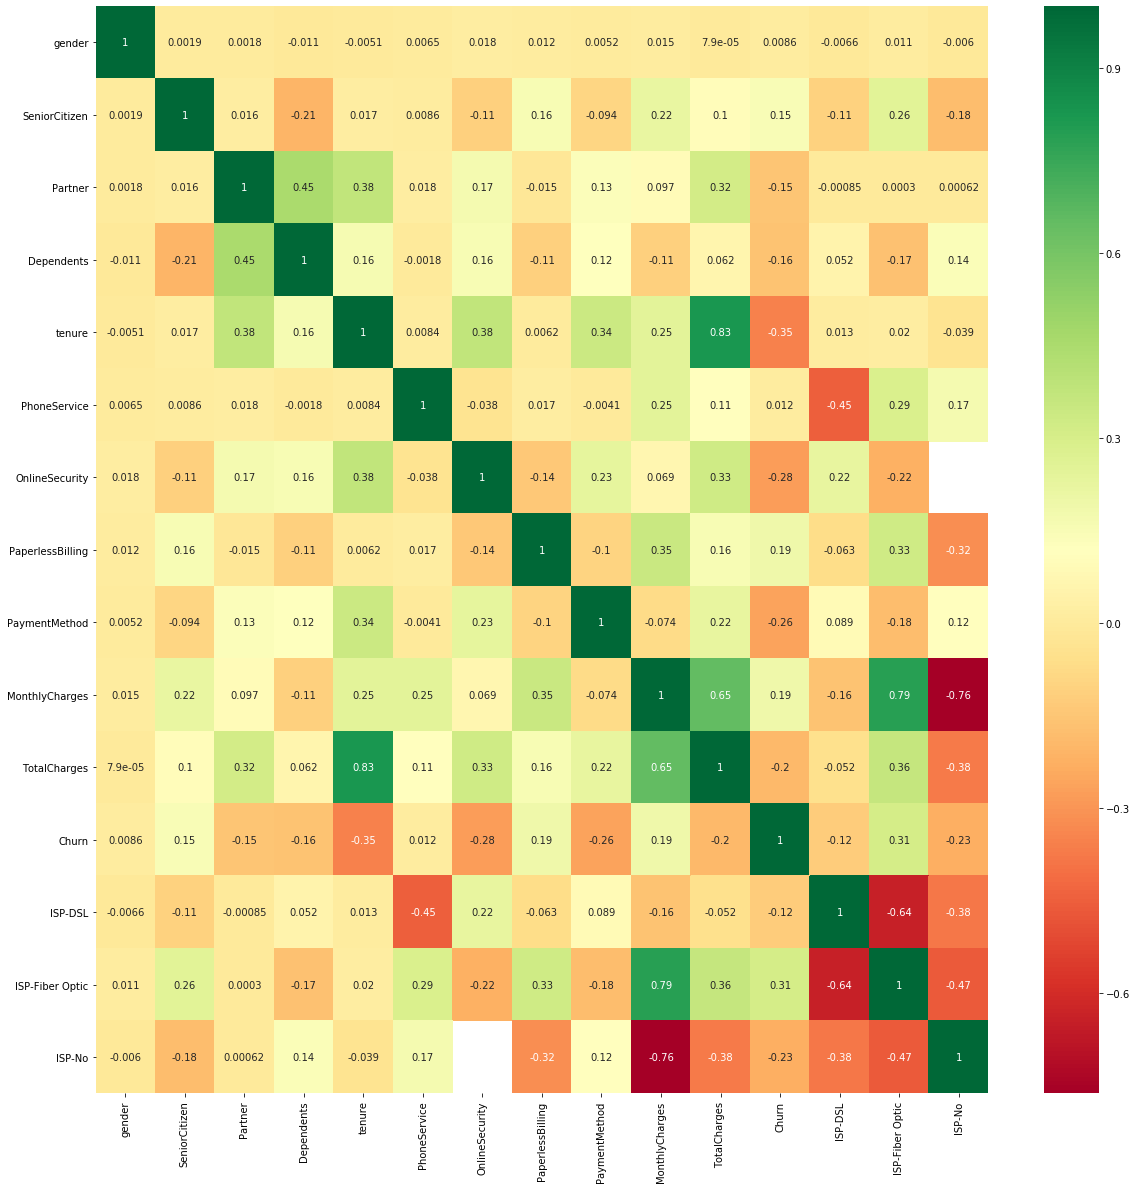

In [22]:
### Creating Correlation Matrix

X = df.iloc[:,1:20]
y = df.iloc[:,20] 
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From the correlation matrix it is clear that We have the following features that are importannt in making conclusions for thefeature selection. 
Since we know that correaltion coeeficient is between -1.0 and 1.0.So from the above correlation matrix we can conclude that values in yellow shade is more clear to pick 7 feature as required for the case study 

Following are the important feature which effect the target varialble churn:
* ISP-Fiber Optic
* MonthlyCharges
* PaperlessBilling
* PhoneService
* gender
* SeniorCitizen
* ISP-DSL

In [23]:
## Dropping all the rest Features

In [156]:
df_features = df[['ISP-Fiber Optic','MonthlyCharges','PaperlessBilling','PhoneService', 'gender','SeniorCitizen','ISP-DSL' , 'Churn']]
df_features.head()

,ISP-Fiber Optic,MonthlyCharges,PaperlessBilling,PhoneService,gender,SeniorCitizen,ISP-DSL,Churn
0,0.0,29.85,1,0,1,0,1.0,0
1,0.0,56.95,0,1,0,0,1.0,0
2,0.0,53.85,1,1,0,0,1.0,1
3,0.0,42.30,0,0,0,0,1.0,0
4,1.0,70.70,1,1,1,0,0.0,1


In [157]:
df_features['gender'].value_counts()

0    3555
1    3488
Name: gender, dtype: int64

## Section 4 Data Exploration and Data Visualization


In the Data Exploration phase, we analyze the standard features for in the dataset. We apply statistical features on the column values and see its significant level with target feature'Churn'. 
With the help of Data Visualisation we will check the value feature with one variable , bi variable and multi variable analsis in term to Churn fields. 

* One variable Visualisation
* Two variable Visualisation
* Multivariant Visualisation 

we will plot different pie charts, histogram, plots using various python tools like seaborn,plotly and matplotlib library in notebook 



In [174]:
# Mapping Values of Churn
churnyes_no ={1:"Yes", 0:"No", }
df_features["Churn"]=df_features["Churn"].map(churnyes_no)

#### One Variable Visualisation

In one variable plot - we will check for the values with churn feature. 

1. Churn Value Vs Gender  
2. Churn Value Vs Senior Citizen
3. Churn Vs ISP ( DSL Provider)

#### 1. Churn Value Vs Gender

In [159]:
labels = df_features['Churn']
values = df_features['gender']
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6,title='Gender Vs Churn')])
fig.show()


In this donought chart , we have analyzed the gender behavior with Churn. 
* 26.9% of gender is Churn 
* 73.1% of gender is No Churn

#### 2. Churn Value Vs Senior Citizen

In [160]:
labels = df_features['Churn']
values = df_features['SeniorCitizen']
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6,title='Gender Vs Churn')])
fig.show()

In this donought chart , we have analyzed the gender behavior with Churn.
* 26.9% of gender is Churn
* 73.1% of gender is No Churn

#### 3. Churn Vs ISP (DSL Provider)

In [161]:
import plotly.express as px       
fig = px.pie(df_features, values='ISP-DSL', names='Churn', title='Internet Service Provide - DSL customer VS Churn')
fig.show()

In this pie chart , we have analyzed the gender behavior with Churn.
* 19% of ISP-DSL is Churn
* 81% of ISP-DSL is No Churn

### Multi variant Plots

#### Churn Vs Gender & Monthly charges

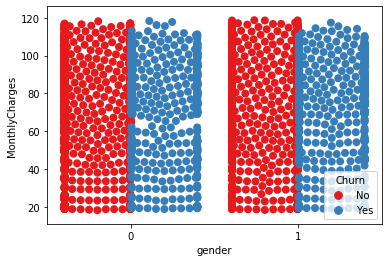

In [162]:
sns.swarmplot(x="gender", y="MonthlyCharges", hue='Churn', data=df_features, palette="Set1", dodge=True, size=8)

In the abover swarmplot - we have learnt gender behavior towards churn value. In the chart gender value :
* 1- Female 
* 0 - Male '

In Gender column, Male & Fenmale is incline towards no churn value.

####  Churn Vs Monthly Charges , Senior Citizen , gender

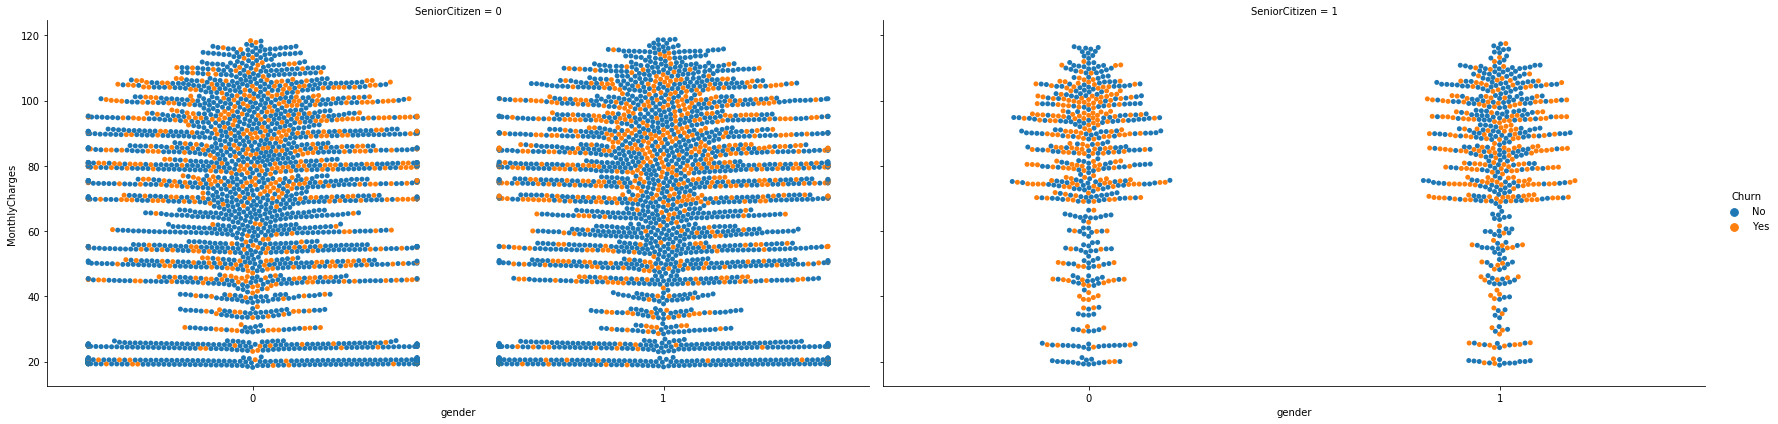

In [175]:
g = sns.catplot(x="gender", y="MonthlyCharges",
                hue="Churn", col="SeniorCitizen",
                data=df_features, kind="swarm",
                height=6, aspect=2);

In [ ]:
In th

#### Churn Vs Multi Columns

We will check for the corresponding columns to check where prediction of churn values.

In [164]:
Churn1 = df_features[df_features["Churn"] == "Yes"]
Nchurn1 = df_features[df_features["Churn"] == "No"]


In [165]:
Churn1[Churn1.columns[3:7]].sum()

PhoneService     1699.0
gender            939.0
SeniorCitizen     476.0
ISP-DSL           459.0
dtype: float64

In [166]:
Nchurn1[Nchurn1.columns[3:7]].sum()

PhoneService     4662.0
gender           2549.0
SeniorCitizen     666.0
ISP-DSL          1962.0
dtype: float64

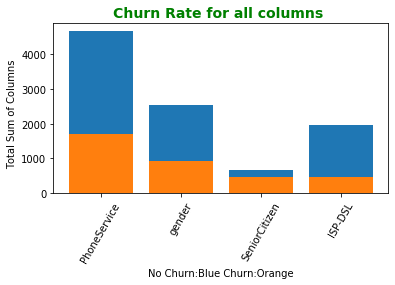

In [167]:

# Create barplot
bars =  df_features.columns[3:7]

# Create bars
y_pos = np.arange(len(bars))
plt.bar(df_features.columns[3:7], Nchurn1[Nchurn1.columns[3:7]].sum())
plt.bar(df_features.columns[3:7], Churn1[Churn1.columns[3:7]].sum())

plt.xticks(y_pos, bars)

# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=60)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

# Custom Axis title
plt.title('Churn Rate for all columns ', fontweight='bold', color = 'Green', fontsize='14', horizontalalignment='center')
plt.ylabel('Total Sum of Columns   ')
plt.xlabel('No Churn:Blue Churn:Orange',color = 'black', fontsize='10')


# Show graphic
plt.show()

In [168]:
#### Comparing the Monthly charges against Churn reaction

In [169]:
import plotly.express as px
fig = px.histogram(df_features, x="MonthlyCharges", color="Churn",title='Churn Prediction for Monthly Charges')
fig.show()

In [171]:
# Mapping Values of Churn
yes_no ={"Yes":1, "No":0, }
df_features['Churn']=df_features['Churn'].map(yes_no)

In [172]:
df_features.head()

,ISP-Fiber Optic,MonthlyCharges,PaperlessBilling,PhoneService,gender,SeniorCitizen,ISP-DSL,Churn
0,0.0,29.85,1,0,1,0,1.0,0
1,0.0,56.95,0,1,0,0,1.0,0
2,0.0,53.85,1,1,0,0,1.0,1
3,0.0,42.30,0,0,0,0,1.0,0
4,1.0,70.70,1,1,1,0,0.0,1


## Section 5 Data Sampling & Train-Test Splitting

### Data Modeling


The original dataset has more than 7K rows, which is sufficinet to training model. 
* Split this sample into train and test partitions
* 75:25 ratio using Train test split.
we are using train test model 

In [93]:
 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

#splitting train and test data 
train,test = train_test_split(df_features,test_size = .25 ,random_state = 111)

In [94]:
df_features.head()

,ISP-Fiber Optic,MonthlyCharges,PaperlessBilling,PhoneService,gender,SeniorCitizen,ISP-DSL,Churn
0,0.0,29.85,1,0,1,0,1.0,0
1,0.0,56.95,0,1,0,0,1.0,0
2,0.0,53.85,1,1,0,0,1.0,1
3,0.0,42.30,0,0,0,0,1.0,0
4,1.0,70.70,1,1,1,0,0.0,1


### seperating dependent and independent variables

In [1]:
train_X = train.iloc[:,0:7]
train_Y = train.iloc[:,7]
test_X  = test.iloc[:,0:7]
test_Y  = test.iloc[:,7]

NameError: name 'train' is not defined

In [96]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Section 6 Classfication Model Implementation 


We consider the following (binary) classifiers to predict the target feature:
1. Logistics Regression Model
2. K-Nearest Neighbors (KNN)
3. Decision trees (DT)

We first sample 7k rows from the full dataset and then split this sample into training and test sets with a 75:25 ratio. 

Steps of Implementation:
* Implement the model on training data 
* Evaluate prediction,Confusion matrix,model_roc_auc 
* Evaluate accuracy
* Plot Confusion Matrix and ROC

## Logistic Regression Model

In [97]:
logit.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [98]:
predictions   = logit.predict(test_X)
probabilities = logit.predict_proba(test_X)

In [101]:
# checking the predictions 
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
conf_matrix = confusion_matrix(test_Y,predictions)

In [103]:
model_roc_auc = roc_auc_score(test_Y,predictions)

In [104]:
accuracy_model = accuracy_score(test_Y,predictions)

In [105]:
fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])

In [106]:
model_roc_auc

0.6141264902295118

In [114]:
conf_matrix

array([[1211,  116],
       [ 297,  137]])

In [107]:
accuracy_model

0.7654741624077229

The `Accuracy of Training model is 76.5% `, which is quite good. The prediction which was estimated also reflect the accuracy of the model. 

### Plot Confusison Matrix

In [108]:
#Plot confusion Matrix
trace1 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Rainbow",
                        name = "matrix")

In [109]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))

In [110]:
trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))

In [111]:
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))

/Users/gabbar/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [112]:
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,2)

In [113]:
py.iplot(fig)

#### Conclusion :  From the above analysis we can see that using Logistics Regression model on the trained data , we had a good prediction with Logistoc Regression Model with 76 percent accuracy. 

### K-Nearest Neighbors (KNN)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [116]:
knn.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

In [126]:
predict_knn = knn.predict(test_X)
predict_knn

array([0, 0, 1, ..., 0, 0, 0])

In [127]:
probabilities_knn = knn.predict_proba(test_X)
probabilities_knn

array([[1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ]])

In [128]:
accuracy_model_knn = accuracy_score(test_Y,predict_knn)

In [129]:
accuracy_model_knn

0.7427597955706985

In [144]:
model_roc_auc = roc_auc_score(test_Y,predict_knn)
model_roc_auc

0.6207628516559649

In [130]:
conf_matrix = confusion_matrix(test_Y,predict_knn)
conf_matrix

array([[1143,  184],
       [ 269,  165]])

In [131]:
fpr,tpr,thresholds = roc_curve(test_Y,probabilities_knn[:,1])

In [132]:
#Plot confusion Matrix
trace1 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Rainbow",
                        name = "matrix")
trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,2)
py.iplot(fig)

/Users/gabbar/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Conclusion : From the above analysis we c an see that we had a good prediction with KNN is 74.2 percent accuracy

## Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [134]:
Decision_classifier = DecisionTreeClassifier(max_depth = 12)

In [135]:
Decision_classifier.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [136]:
predict_dt = Decision_classifier.predict(test_X)
predict_dt

array([0, 0, 1, ..., 0, 0, 0])

In [137]:
probabilities_dt = Decision_classifier.predict_proba(test_X)
probabilities_dt

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.375     , 0.625     ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.90990991, 0.09009009]])

In [138]:
accuracy_model_dt = accuracy_score(test_Y,predict_dt)
accuracy_model_dt

0.7421919363997729

In [139]:
model_roc_auc_dt  = roc_auc_score(test_Y,predict_dt)
model_roc_auc_dt

0.6250377657930469

In [141]:
conf_matrix = confusion_matrix(test_Y,predict_dt)
conf_matrix

array([[1136,  191],
       [ 263,  171]])

In [142]:
fpr,tpr,thresholds = roc_curve(test_Y,probabilities_dt[:,1])

In [145]:
#Plot confusion Matrix
trace1 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Rainbow",
                        name = "matrix")
trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,2)
py.iplot(fig)

/Users/gabbar/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Conclusion : From the above analysis we c an see that we had a good prediction with Decision Tree is 74.2 percent accuracy

## Section 7 Performance Comparison

Though we used AUC to optimize the algorithm hyperparameters, we shall consider the following metrics to evaluate models based on the test set:

* Accuracy
* Precision
* Recall
* F1 Score (the harmonic average of precision and recall)
* Confusion Matrix

In [177]:
from sklearn import metrics
print("\nClassification report for Logistics Regression") 
print(metrics.classification_report(test_Y, predictions))
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(test_Y, predict_knn))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(test_Y, predict_dt))


Classification report for Logistics Regression
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1327
           1       0.54      0.32      0.40       434

    accuracy                           0.77      1761
   macro avg       0.67      0.61      0.63      1761
weighted avg       0.74      0.77      0.74      1761


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1327
           1       0.47      0.38      0.42       434

    accuracy                           0.74      1761
   macro avg       0.64      0.62      0.63      1761
weighted avg       0.73      0.74      0.73      1761


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1327
           1       0.47      0.39      0.43       434

    accuracy                           0.74    

#### Confusion Matrix of all models

In [178]:
from sklearn import metrics
print("\nConfusion matrix for logistics Regression") 
print(metrics.confusion_matrix(test_Y, predictions))
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(test_Y, predict_knn))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(test_Y, predict_dt))


Confusion matrix for logistics Regression
[[1211  116]
 [ 297  137]]

Confusion matrix for K-Nearest Neighbor
[[1143  184]
 [ 269  165]]

Confusion matrix for Decision Tree
[[1136  191]
 [ 263  171]]


#### Comparing Accuracy of all models using Boxplot

In [146]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('Decision', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [147]:
from sklearn import model_selection
results =[]
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, train_X,train_Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

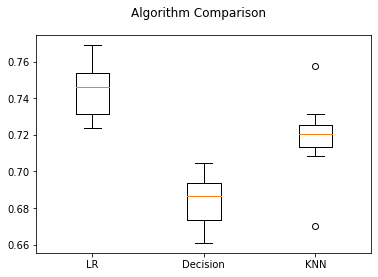

In [148]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Section 7 Conclusion 


The Logistics Regression model with 7 of the best features selected by Correlation Matrix produces the highest Accuracy score on the training data. In addition, when evaluated on the test data (in a cross-validated fashion), the Logistics Regression again outperforms both Decision Tree and k-Nearest Neighbor models. 

However we also understand that there was very marginal difference in the accuracy of prediction values :
* Logistics Regression: 76% 
* KNN Neighbors : 74%
* Decision Tree : 74 %

We also observe that our models are not very sensitive to the number of features as selected by Correlation Matrix.
As per of our case study the telecom churn prediction model with using the below features : 
* ISP-Fiber Optic
* MonthlyCharges
* PaperlessBilling
* PhoneService
* gender
* SeniorCitizen
* ISP-DSL

The `Logistic Regression Model with 76% accuracy rate ` will be best suited model for telecom churn dataset.

## Section 8 References



* Referred Report format from : https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#K-Nearest-Neighbors-(KNN)
* RMIT Material from Course 
* Grpahs,plots were taken from : https://plotly.com/python/bar-charts/
* https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/